in a Jewish population of 6000000, with mean IQ of 110, 136299.9 people are IQ=140 or higher
in a Goys population of 200000000, with mean IQ of 100, 759665.0 people are IQ=140 or higher
in a Blacks population of 43820000, with mean IQ of 89.9, 16970.0 people are IQ=140 or higher


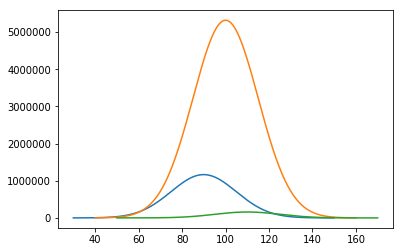

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class IQplotter(object):
    """ spread              # how many std-dev to show out from peak (default 4)
        std_dev             # iq standard deviation (typically 15 points)
        grain               # how fine a grain to the distribution ('1' is one 'bin' per IQ point)
        peeps               # quantity of people under curve
        mean_pop_iq         # mean IQ of the given population (ie Jews=108, Goyim=100, Blacks=85)
        cut_above           # answers question about how many are above a given IQ
        name                # give your population an adjective
    """
    def __init__(self, spread=4, std_dev=15, grain=1000, peeps=6000000,
                 mean_pop_iq=108, cut_above=140, name="Jewish"):
        self.spread = spread
        self.std_dev = std_dev
        self.grain = grain
        self.peeps = peeps
        self.mean_pop_iq = mean_pop_iq
        self.cut_above = cut_above
        self.name = name

        iq_spread = spread * std_dev
        iq_lowest = mean_pop_iq - iq_spread
        iq_highest = mean_pop_iq + iq_spread

        self.x_axis = np.arange(iq_lowest, iq_highest, 1 / float(grain))
        self.y = norm.pdf(self.x_axis, mean_pop_iq, std_dev) * peeps
        self.part = np.sum(self.y[np.where(self.x_axis >= cut_above)]) / grain
        print("in a {} population of {}, with mean IQ of {}, {} people are IQ={} or higher"
                .format(name, peeps, mean_pop_iq, np.round(self.part,1), cut_above))

    def plot(self):
        plt.plot(self.x_axis, self.y)

if __name__ == "__main__":
    us_jews = IQplotter(mean_pop_iq=110, std_dev=15)
    us_goys = IQplotter(peeps=200000000, mean_pop_iq=100, name="Goys")
    us_black = IQplotter(peeps=int(313000000 * 0.14), mean_pop_iq=89.9, name="Blacks")
    

    us_black.plot()
    us_goys.plot()
    us_jews.plot()

    plt.show()
    

    
    